## **TIL**
### **텍스트 전처리와 그래프 이론**
* **kaggle Netflix 데이터 전처리 및 영화 추천 예제**
* `vectorizer` -> 띄어쓰기 단위로 `token`화 
* `tfidf_vectorizer = TfidfVectorizer()`
* `tfidf_matrix = tfidf_vectorizer.fit_transform(df['all_tokens'])`
     
    * TF-IDF 벡터화의 fit_transform() 함수 역할
    fit_transform() 함수는 TF-IDF 벡터화 과정을 수행하는 주요 함수입니다. 이 함수는 다음과 같은 역할을 수행합니다.

        > 1. 학습 데이터로부터 단어 집합(vocabulary) 생성:
        학습 데이터로부터 모든 단어를 추출하여 단어 집합을 생성합니다.
        단어 집합은 TF-IDF 벡터화 과정에서 사용되는 기본 단위입니다.

        > 2. 각 단어의 TF-IDF 점수 계산:
        학습 데이터 각 문서에서 각 단어의 빈도(TF)를 계산합니다.
        전체 문서 집합에서 각 단어의 문서 빈도(DF)를 계산합니다.
        TF-IDF 점수를 계산합니다.

        > 3. 학습 데이터 벡터화:
        각 문서를 TF-IDF 점수 벡터로 변환합니다.
        벡터화된 문서는 정보 검색, 문서 분류, 문서 요약 등 다양한 NLP 작업에 활용될 수 있습니다.

        > 4. 변환된 벡터 반환:
        학습 데이터의 벡터화된 결과를 반환합니다.

* **그래프 알고리즘은 너무 어려우니까 깊이 공부하지 말기**
* **탐색 알고리즘 공부하는 것이 적절함**

* **그래프 알고리즘**
    * 파이썬으로 그려보기
    <a>https://chaelist.github.io/docs/network_analysis/network_basics/</a>
* 예) 구글의 검색엔진 알고리즘

* **PageRank 소개**
* > 1996년 구글 창업자인 Larry Page와 Sergey Brin이 개발한 PageRank는 웹페이지의 중요도를 결정하는 알고리즘으로 1998년 구글의 검색엔진에 도입됨
* > 구글의 검색 메커니즘에는 PageRank가 존재하나 구글 검색에서 사용하는 약 200여 가지의 검색 알고리즘 중 하나임
* > PageRank는 고유벡터(eigenvector)값으로 구할 수 있음
* > 웹페이지의 관계와 댐핑 팩터를 고려한 정방행렬의 최대 고유치(maximum eigen- value)에 대한 고유벡터로 PageRank값을 구할 수 있음

### 실습

In [5]:
%pip install scikit-learn

  Using cached scikit_learn-1.0.2-cp37-cp37m-win_amd64.whl (7.1 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached scipy-1.7.3-cp37-cp37m-win_amd64.whl (34.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import time 
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans

In [2]:
# plt.style.use('seaborn')
# plt.rcParams['figure.figsize'] = [14,14]

df = pd.read_csv("./data/netflix_titles.csv")
df.head()
# path = 'C:/Users/user/Desktop/tistory/'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
# 시간 정보 정제
df["date_added"] = pd.to_datetime(df['date_added'])
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day

original_df = df.copy()

In [5]:
# "director, listed_in, cast and country" 컬럼을 리스트 형태로 저장
# NaN이면 빈 리스트가 생성됨 
df['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['categories'] = df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['actors'] = df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['countries'] = df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,directors,categories,actors,countries
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,9.0,"[Richard Finn, Tim Maltby]","[Children & Family Movies, Comedies]","[Alan Marriott, Andrew Toth, Brian Dobson, Col...","[United States, India, South Korea, China]"
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,9.0,[],[Stand-Up Comedy],[Jandino Asporaat],[United Kingdom]
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,8.0,[],[Kids' TV],"[Peter Cullen, Sumalee Montano, Frank Welker, ...",[United States]
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,8.0,[],[Kids' TV],"[Will Friedle, Darren Criss, Constance Zimmer,...",[United States]
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,8.0,[Fernando Lebrija],[Comedies],"[Nesta Cooper, Kate Walsh, John Michael Higgin...",[United States]


### EDA: 토큰화 및 표제어 추출, 불용어 처리

In [6]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
import re
title_token = [word_tokenize(title) for title in list(df['title']) if title.isdigit()==False]
title_token[:10]

[['Norm', 'of', 'the', 'North', ':', 'King', 'Sized', 'Adventure'],
 ['Jandino', ':', 'Whatever', 'it', 'Takes'],
 ['Transformers', 'Prime'],
 ['Transformers', ':', 'Robots', 'in', 'Disguise'],
 ['#', 'realityhigh'],
 ['Apaches'],
 ['Automata'],
 ['Fabrizio', 'Copano', ':', 'Solo', 'pienso', 'en', 'mi'],
 ['Fire', 'Chasers'],
 ['Good', 'People']]

In [ ]:
desc_token = [word_tokenize(title) for title in list(df['description']) if title.isdigit()==False]
desc_token[:10]

In [ ]:
l

In [77]:
for title in title_token:
    for tit in title:


['Norm']
['of']
['the']
['North']
['']
['King']
['Sized']
['Adventure']
['Jandino']
['']
['Whatever']
['it']
['Takes']
['Transformers']
['Prime']
['Transformers']
['']
['Robots']
['in']
['Disguise']
['']
['realityhigh']
['Apaches']
['Automata']
['Fabrizio']
['Copano']
['']
['Solo']
['pienso']
['en']
['mi']
['Fire']
['Chasers']
['Good']
['People']
['Joaquín']
['Reyes']
['']
['Una']
['y']
['no']
['más']
['Kidnapping']
['Mr']
['Heineken']
['Krish']
['Trish']
['and']
['Baltiboy']
['Krish']
['Trish']
['and']
['Baltiboy']
['']
['Battle']
['of']
['Wits']
['Krish']
['Trish']
['and']
['Baltiboy']
['']
['Best']
['Friends']
['Forever']
['Krish']
['Trish']
['and']
['Baltiboy']
['']
['Comics']
['of']
['India']
['Krish']
['Trish']
['and']
['Baltiboy']
['']
['Oversmartness']
['Never']
['Pays']
['Krish']
['Trish']
['and']
['Baltiboy']
['']
['Part']
['II']
['Krish']
['Trish']
['and']
['Baltiboy']
['']
['The']
['Greatest']
['Trick']
['Love']
['Manhattan']
['Romance']
['Moonwalkers']
['Rolling']
['Papers

In [7]:
df2 = df.copy()

**전처리: 표제어 추출 및 불용어 제거**

In [17]:
from nltk.stem import WordNetLemmatizer
# WordNetLemmatizer가 성능이 우수하기 떄문에 사용
# token화 후 확인한 결과 ":", "#" 등의 특수 문자가 포함되어 있어서 제거
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [re.sub(r'[^\w\s]','',lemmatizer.lemmatize(token)) for token in tokens]
lemmatized_title_tokens = [lemmatize_tokens(sentence) for sentence in title_token]


In [18]:
lemmatized_title_tokens

[['Norm', 'of', 'the', 'North', '', 'King', 'Sized', 'Adventure'],
 ['Jandino', '', 'Whatever', 'it', 'Takes'],
 ['Transformers', 'Prime'],
 ['Transformers', '', 'Robots', 'in', 'Disguise'],
 ['', 'realityhigh'],
 ['Apaches'],
 ['Automata'],
 ['Fabrizio', 'Copano', '', 'Solo', 'pienso', 'en', 'mi'],
 ['Fire', 'Chasers'],
 ['Good', 'People'],
 ['Joaquín', 'Reyes', '', 'Una', 'y', 'no', 'más'],
 ['Kidnapping', 'Mr', 'Heineken'],
 ['Krish', 'Trish', 'and', 'Baltiboy'],
 ['Krish', 'Trish', 'and', 'Baltiboy', '', 'Battle', 'of', 'Wits'],
 ['Krish', 'Trish', 'and', 'Baltiboy', '', 'Best', 'Friends', 'Forever'],
 ['Krish', 'Trish', 'and', 'Baltiboy', '', 'Comics', 'of', 'India'],
 ['Krish', 'Trish', 'and', 'Baltiboy', '', 'Oversmartness', 'Never', 'Pays'],
 ['Krish', 'Trish', 'and', 'Baltiboy', '', 'Part', 'II'],
 ['Krish', 'Trish', 'and', 'Baltiboy', '', 'The', 'Greatest', 'Trick'],
 ['Love'],
 ['Manhattan', 'Romance'],
 ['Moonwalkers'],
 ['Rolling', 'Papers'],
 ['Stonehearst', 'Asylum'],
 [

In [9]:
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,directors,categories,actors,countries,lemmatized_text
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,9.0,"[Richard Finn, Tim Maltby]","[Children & Family Movies, Comedies]","[Alan Marriott, Andrew Toth, Brian Dobson, Col...","[United States, India, South Korea, China]","[N, o, r, m, , o, f, , t, h, e, , N, o, r, ..."
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,9.0,[],[Stand-Up Comedy],[Jandino Asporaat],[United Kingdom],"[J, a, n, d, i, n, o, :, , W, h, a, t, e, v, ..."
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,8.0,[],[Kids' TV],"[Peter Cullen, Sumalee Montano, Frank Welker, ...",[United States],"[T, r, a, n, s, f, o, r, m, e, r, s, , P, r, ..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,8.0,[],[Kids' TV],"[Will Friedle, Darren Criss, Constance Zimmer,...",[United States],"[T, r, a, n, s, f, o, r, m, e, r, s, :, , R, ..."
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,8.0,[Fernando Lebrija],[Comedies],"[Nesta Cooper, Kate Walsh, John Michael Higgin...",[United States],"[#, r, e, a, l, i, t, y, h, i, g, h]"


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
def join_tokens_to_string(tokens):
    return ' '.join(tokens)
string_documents = list(map(join_tokens_to_string, lemmatized_title_tokens))
tdm = cv.fit_transform(string_documents)


In [21]:
tdm

<6225x7068 sparse matrix of type '<class 'numpy.int64'>'
	with 18165 stored elements in Compressed Sparse Row format>

In [23]:
feature = cv.get_feature_names()
print(feature)
print('\n-----tf Matrix------')
txtTDM=tdm.todense()
print(txtTDM)

['009', '10', '100', '1000', '10000', '100kg', '101', '101yearold', '12', '123', '13', '13th', '14', '15', '15aug', '16', '18', '1897', '1898', '19141918', '19391945', '1976', '19821992', '1984', '1988', '1989', '1993', '1994', '19962016', '1997', '1st', '20', '2000s', '2009', '2011', '2015', '2017', '2018', '2019', '20192020', '2036', '2050', '20th', '21', '2215', '22jul', '2307', '2359', '24', '25', '26', '27', '28', '2gether', '2nd', '30', '300', '3000', '369', '36th', '3below', '3rd', '40', '401', '42', '420', '43', '4400', '45', '48', '4k', '4l', '4th', '5050', '505050', '51', '54', '5cm', '60', '61', '652', '66', '68', '69', '70s', '719', '72', '7seeds', '89', '90', '92', '93', '9th', 'aa', 'aadha', 'aadu', 'aagey', 'aahe', 'aajcha', 'aakhri', 'aalorukkam', 'aamir', 'aana', 'aane', 'aankh', 'aap', 'aapke', 'aarah', 'aarakshan', 'aarambh', 'aardman', 'aaron', 'aashayein', 'aashik', 'aata', 'aaviri', 'abby', 'abcd', 'abdo', 'abducted', 'abdullah', 'abel', 'abhinetri', 'abnormal', '

c:\Users\bluecom001\miniconda3\envs\konlpy\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
df_titles = pd.DataFrame(tdm.todense(), columns=feature)

In [25]:
titleList = [title for title in df_titles.columns if title.isdigit()==False]
titleList[:10]

['100kg',
 '101yearold',
 '13th',
 '15aug',
 '1st',
 '2000s',
 '20th',
 '22jul',
 '2gether',
 '2nd']

In [26]:
import pandas as pd
def tf(t, d):
    return d.count(t)

vocab = list(set(w for doc in titleList for w in doc.split()))
vocab.sort()

result = []

N = len(titleList)
for i in range(N):
    d = titleList[i]
    result.append([])
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,100kg,101yearold,13th,15aug,1st,2000s,20th,22jul,2gether,2nd,...,แผนรายนายเจาเลห,忍者ハットリくん,海的儿子,마녀사냥,미니특공대,반드시,영웅의,잡는다,최강전사,탄생
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
# DTM 데이터 프레임을 행렬로 변환함.
# 사이킷런 CountVectorizer  패키지의 txtTDM=tdm.todense()
todense=tf_.values
print(todense.shape)
print(todense)

# 레이블 보관 사이킷런 CountVectorizer  패키지의 feature=cv.get_feature_names()
feature=tf_.columns.values
print(feature)

(6995, 6995)
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['100kg' '101yearold' '13th' ... '잡는다' '최강전사' '탄생']


In [28]:
print('\n-----총 TF구하기(열단위 집계)------')

countTDM = np.sum(todense,axis=0)
countTDM


-----총 TF구하기(열단위 집계)------


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
print('▶ countTDM의 [[1 1 1 3 3]] 의(1,5)를 ==> [1 1 1 3 3]의 (5, ) 로 변경해야함.')
print('▶ TF의 총합인 countTDM의 shape=>')
print(np.shape(countTDM))
print(countTDM)

print('\n')
# 2차원 행렬을 1차원으로 변형, 행렬변환은 reshape도 사용되며 np.squeeze도 사용가능함.(딥러닝에서도 사용됨.)
# 또는 직접 행렬을 리스트로 옮겨도 됨.
count=np.squeeze(np.asarray(countTDM))   
print('▶ TF의 총합인 변경된 countTDM의 shape=>')
print(np.shape(count))
print(count)


## feature값과 총TF값을 이용한 리스트를 작성합니다.
word_count=list(zip(feature,count))
word_count

▶ countTDM의 [[1 1 1 3 3]] 의(1,5)를 ==> [1 1 1 3 3]의 (5, ) 로 변경해야함.
▶ TF의 총합인 countTDM의 shape=>
(6995,)
[1 1 1 ... 1 1 1]


▶ TF의 총합인 변경된 countTDM의 shape=>
(6995,)
[1 1 1 ... 1 1 1]


[('100kg', 1),
 ('101yearold', 1),
 ('13th', 1),
 ('15aug', 1),
 ('1st', 1),
 ('2000s', 1),
 ('20th', 1),
 ('22jul', 1),
 ('2gether', 1),
 ('2nd', 1),
 ('36th', 1),
 ('3below', 1),
 ('3rd', 1),
 ('4k', 1),
 ('4l', 1),
 ('4th', 1),
 ('5cm', 1),
 ('70s', 1),
 ('7seeds', 1),
 ('9th', 1),
 ('aa', 167),
 ('aadha', 1),
 ('aadu', 1),
 ('aagey', 2),
 ('aahe', 1),
 ('aajcha', 1),
 ('aakhri', 1),
 ('aalorukkam', 1),
 ('aamir', 1),
 ('aana', 1),
 ('aane', 3),
 ('aankh', 1),
 ('aap', 5),
 ('aapke', 1),
 ('aarah', 1),
 ('aarakshan', 1),
 ('aarambh', 1),
 ('aardman', 1),
 ('aaron', 2),
 ('aashayein', 1),
 ('aashik', 1),
 ('aata', 2),
 ('aaviri', 1),
 ('abby', 1),
 ('abcd', 1),
 ('abdo', 1),
 ('abducted', 1),
 ('abdullah', 1),
 ('abel', 3),
 ('abhinetri', 1),
 ('abnormal', 1),
 ('abominable', 1),
 ('about', 1),
 ('above', 1),
 ('abrazo', 1),
 ('abroad', 1),
 ('abstract', 1),
 ('abu', 3),
 ('abyss', 1),
 ('abzurdah', 1),
 ('academia', 1),
 ('academy', 1),
 ('acapulco', 1),
 ('acaster', 1),
 ('accident

In [30]:
import numpy as np
# np.corrcoef(tdm.todense(),rowvar=0)  사이킷런 패키지 사용시 가능한 명령
word_corr=np.corrcoef(todense,rowvar=False)   # rowvar옵션을 0(False)와 1(True)로 하여서 행열단위의 계산 선택가능함.
word_corr

array([[ 1.00000000e+00, -1.42979697e-04, -1.42979697e-04, ...,
        -1.42979697e-04, -1.42979697e-04, -1.42979697e-04],
       [-1.42979697e-04,  1.00000000e+00, -1.42979697e-04, ...,
        -1.42979697e-04, -1.42979697e-04, -1.42979697e-04],
       [-1.42979697e-04, -1.42979697e-04,  1.00000000e+00, ...,
        -1.42979697e-04, -1.42979697e-04, -1.42979697e-04],
       ...,
       [-1.42979697e-04, -1.42979697e-04, -1.42979697e-04, ...,
         1.00000000e+00, -1.42979697e-04, -1.42979697e-04],
       [-1.42979697e-04, -1.42979697e-04, -1.42979697e-04, ...,
        -1.42979697e-04,  1.00000000e+00, -1.42979697e-04],
       [-1.42979697e-04, -1.42979697e-04, -1.42979697e-04, ...,
        -1.42979697e-04, -1.42979697e-04,  1.00000000e+00]])

In [98]:
display(tf_)
tf_.corr()

,100kg,13th,1st,2000s,20s,20th,2gether,2nd,36th,3an,...,แผนร,忍者ハットリくん,海的儿子,마녀사냥,미니특공대,반드시,영웅의,잡는다,최강전사,탄생
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


,100kg,13th,1st,2000s,20s,20th,2gether,2nd,36th,3an,...,แผนร,忍者ハットリくん,海的儿子,마녀사냥,미니특공대,반드시,영웅의,잡는다,최강전사,탄생
100kg,1.000000,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,...,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144
13th,-0.000144,1.000000,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,...,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144
1st,-0.000144,-0.000144,1.000000,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,...,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144
2000s,-0.000144,-0.000144,-0.000144,1.000000,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,...,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144
20s,-0.000144,-0.000144,-0.000144,-0.000144,1.000000,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,...,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
반드시,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,...,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,1.000000,-0.000144,-0.000144,-0.000144,-0.000144
영웅의,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,...,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,1.000000,-0.000144,-0.000144,-0.000144
잡는다,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,...,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,1.000000,-0.000144,-0.000144
최강전사,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,...,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,-0.000144,1.000000,-0.000144


In [ ]:
import seaborn as sns
sns.heatmap(tf_.corr(),annot=True,cmap = 'PuBu')

In [31]:
### 단어의 집합별 상관계수 값 리스트화 하기

words=feature
edges = []

for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j], word_corr[i,j]))

In [32]:
edges

[('100kg', '101yearold', -0.00014297969688304357),
 ('100kg', '13th', -0.00014297969688304357),
 ('100kg', '15aug', -0.00014297969688304357),
 ('100kg', '1st', -0.00014297969688304357),
 ('100kg', '2000s', -0.00014297969688304357),
 ('100kg', '20th', -0.00014297969688304357),
 ('100kg', '22jul', -0.00014297969688304357),
 ('100kg', '2gether', -0.00014297969688304357),
 ('100kg', '2nd', -0.00014297969688304357),
 ('100kg', '36th', -0.00014297969688304357),
 ('100kg', '3below', -0.00014297969688304354),
 ('100kg', '3rd', -0.00014297969688304354),
 ('100kg', '4k', -0.00014297969688304354),
 ('100kg', '4l', -0.00014297969688304354),
 ('100kg', '4th', -0.00014297969688304354),
 ('100kg', '5cm', -0.00014297969688304354),
 ('100kg', '70s', -0.00014297969688304354),
 ('100kg', '7seeds', -0.00014297969688304354),
 ('100kg', '9th', -0.00014297969688304354),
 ('100kg', 'aa', -0.0018475008508270802),
 ('100kg', 'aadha', -0.00014297969688304354),
 ('100kg', 'aadu', -0.00014297969688304354),
 ('100k

In [33]:
# 상관도 내림차순순으로 sort(reverse=True)
# 상관도 오름차순순으로 sort(reverse=False)
edges = sorted(edges, key=lambda x:x[2],reverse=True)
edges[:5] #상관도 높은 상위 5개 자료보기

[('chris', 'christ', 0.9427415703656332),
 ('saath', 'saathsaath', 0.8944144032385534),
 ('comin', 'coming', 0.8943632188086557),
 ('chill', 'hill', 0.8943632188086533),
 ('india', 'indian', 0.8943632188086525)]

In [34]:
##############################
### 상관계수 시각화에 사용할 가중치를
### 상관도로 숫자로 작업하고자 함
######################################

weight_list=[x[2] for x in edges]   # weight_list = [weight for _, _, weight in edges] 도 사용가능
weight_list

[0.9427415703656332,
 0.8944144032385534,
 0.8943632188086557,
 0.8943632188086533,
 0.8943632188086525,
 0.8943632188086508,
 0.8817908901485633,
 0.8817908901485614,
 0.8817908901485575,
 0.8659634718357223,
 0.8659634718357211,
 0.8659634718357209,
 0.8659634718357204,
 0.8659634718357202,
 0.8659634718357186,
 0.8659634718357165,
 0.8659634718357132,
 0.8659634718357131,
 0.8658394350473622,
 0.8657773300458077,
 0.8450333370292509,
 0.8450333370292481,
 0.8450333370292453,
 0.8268147000426805,
 0.8164771273338767,
 0.8164381992765899,
 0.8164381992765894,
 0.8164381992765894,
 0.8164381992765894,
 0.8164381992765894,
 0.8164381992765893,
 0.8164381992765892,
 0.8164381992765892,
 0.8164381992765891,
 0.8164381992765889,
 0.8164381992765888,
 0.8164381992765887,
 0.8164381992765886,
 0.8164381992765886,
 0.8164381992765886,
 0.8164381992765884,
 0.8164381992765883,
 0.8164381992765883,
 0.8164381992765881,
 0.816438199276588,
 0.816438199276588,
 0.8164381992765879,
 0.816438199276

In [35]:
##############################
### 상관계수 시각화에 사용할 연결된 노드 이름 쌍
######################################
edge_list = [(word1,word2) for word1, word2, weight in edges]
edge_list

[('chris', 'christ'),
 ('saath', 'saathsaath'),
 ('comin', 'coming'),
 ('chill', 'hill'),
 ('india', 'indian'),
 ('pine', 'pines'),
 ('roma', 'roman'),
 ('rati', 'ratio'),
 ('foo', 'foot'),
 ('advent', 'adventure'),
 ('devil', 'evil'),
 ('america', 'meri'),
 ('greg', 'grego'),
 ('zombi', 'zombie'),
 ('weir', 'weird'),
 ('evolution', 'revolution'),
 ('flow', 'flower'),
 ('flower', 'lower'),
 ('liv', 'live'),
 ('hear', 'heart'),
 ('border', 'order'),
 ('desi', 'design'),
 ('cross', 'ross'),
 ('sid', 'side'),
 ('bibi', 'bibikbibikku'),
 ('insan', 'winsanity'),
 ('fortunate', 'tuna'),
 ('public', 'republic'),
 ('soni', 'sonic'),
 ('surf', 'surface'),
 ('racer', 'racers'),
 ('broke', 'broken'),
 ('ritual', 'spiritual'),
 ('dance', 'dancer'),
 ('lord', 'lords'),
 ('haseen', 'seen'),
 ('adventure', 'adventures'),
 ('destroy', 'troy'),
 ('explain', 'plain'),
 ('locke', 'locked'),
 ('scare', 'scared'),
 ('breaker', 'breakers'),
 ('train', 'trains'),
 ('matte', 'matter'),
 ('isla', 'island'),
 (

In [36]:
import networkx as nx
G = nx.Graph()
rank=10

edge_set = set()  
for word1, word2, weight in edges[:rank]:   # 상관도가 높은 값에서 101개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))
edge_set

{('advent', 'adventure'),
 ('chill', 'hill'),
 ('chris', 'christ'),
 ('comin', 'coming'),
 ('foo', 'foot'),
 ('india', 'indian'),
 ('pine', 'pines'),
 ('rati', 'ratio'),
 ('roma', 'roman'),
 ('saath', 'saathsaath')}

In [37]:
print('\n ▶ 노드갯수 출력')   # feature 갯수 (R, 분석, 시각화, 머신러닝, 파이썬, 차트)
print(G.number_of_nodes())

print('\n ▶노드값 출력')
print(G.nodes)

print('\n ▶ 엣지(word1,word2)값 출력')
print(G.edges)


## 디그리는 노드에서 분기하는 선의 갯수로서
# 여기서는 모든 노드와 연결되어 있음.(상관도를 모두 구함으로)
# 그래서 분석일때는 5개의 노드(n-1)개의 디그리가 생김.  분석->시각화, 분석->머신러닝, 분석->파이썬, 분석->차트, 분석-R
print('\n ▶ 디그리값 출력')  
print(G.degree)


print('\n ▶ 인접')
print(G.adj)
      
print('\n ▶ edges의 갯수')
print(G.number_of_edges())


print('\n ▶ 요약 ')
print(nx.info(G))


 ▶ 노드갯수 출력
20

 ▶노드값 출력
['chris', 'christ', 'saath', 'saathsaath', 'comin', 'coming', 'chill', 'hill', 'india', 'indian', 'pine', 'pines', 'roma', 'roman', 'rati', 'ratio', 'foo', 'foot', 'advent', 'adventure']

 ▶ 엣지(word1,word2)값 출력
[('chris', 'christ'), ('saath', 'saathsaath'), ('comin', 'coming'), ('chill', 'hill'), ('india', 'indian'), ('pine', 'pines'), ('roma', 'roman'), ('rati', 'ratio'), ('foo', 'foot'), ('advent', 'adventure')]

 ▶ 디그리값 출력
[('chris', 1), ('christ', 1), ('saath', 1), ('saathsaath', 1), ('comin', 1), ('coming', 1), ('chill', 1), ('hill', 1), ('india', 1), ('indian', 1), ('pine', 1), ('pines', 1), ('roma', 1), ('roman', 1), ('rati', 1), ('ratio', 1), ('foo', 1), ('foot', 1), ('advent', 1), ('adventure', 1)]

 ▶ 인접
{'chris': {'christ': {'weight': 0.9427415703656332}}, 'christ': {'chris': {'weight': 0.9427415703656332}}, 'saath': {'saathsaath': {'weight': 0.8944144032385534}}, 'saathsaath': {'saath': {'weight': 0.8944144032385534}}, 'comin': {'coming': {'weight':

[('chris', 'christ', 0.9427415703656332), ('saath', 'saathsaath', 0.8944144032385534), ('comin', 'coming', 0.8943632188086557), ('chill', 'hill', 0.8943632188086533), ('india', 'indian', 0.8943632188086525), ('pine', 'pines', 0.8943632188086508), ('roma', 'roman', 0.8817908901485633), ('rati', 'ratio', 0.8817908901485614), ('foo', 'foot', 0.8817908901485575), ('advent', 'adventure', 0.8659634718357223)]


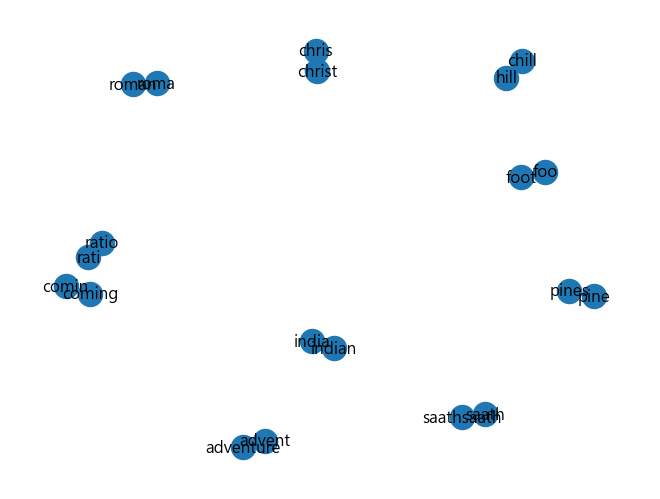

In [39]:
###############################
### 상관계수 시각화
## 그래프를  그리기 위해서 준비해야 하는건
## 몇개의 노드를 준비할지,
# 그 노드에서 몇개의 디그리가 나올지
# 그리고 엣지(노드와 노드의 쌍)별 거리는 무엇으로 할지.
##############################

import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


print(edges[:rank])
nx.draw(G, with_labels = True, font_family=font_name, width=weight_list[:rank],edge_color='lightblue')   # 상관관계값이 높을수록 가깝게 표시됨


In [19]:
import matplotlib as mat
mat.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
df

In [43]:
start_time = time.time()
text_content = df['description']
vector = TfidfVectorizer(max_df=0.4,         # drop words that occur in more than X percent of documents
                             min_df=1,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )
tfidf = vector.fit_transform(text_content)